In [678]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [679]:
dataset=pd.read_csv("/kaggle/input/titanic/train.csv",header=0)
testset=pd.read_csv("/kaggle/input/titanic/test.csv",header=0)
print(dataset.describe())
dataset.head()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [680]:
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distplot')

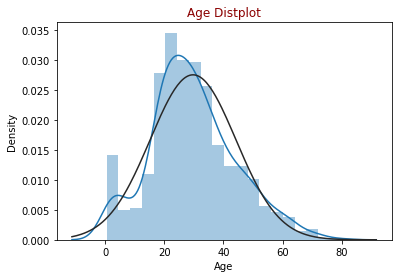

In [681]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.distplot(dataset["Age"], fit=norm)
plt.title("Age Distplot", color = "darkred")

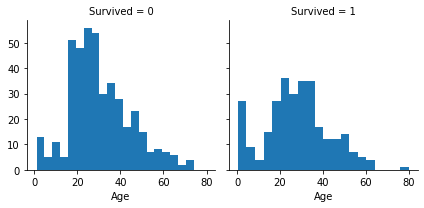

In [682]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [683]:
dataset[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived",ascending = False).style.background_gradient("Greens")

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [684]:
dataset[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived",ascending = False).style.background_gradient("Greens")

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [685]:
dataset[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).count().sort_values(by = "SibSp",ascending = False).style.background_gradient("Greens")

,SibSp,Survived
6,8,7
5,5,5
4,4,18
3,3,16
2,2,28
1,1,209
0,0,608


In [686]:
dataset[["Parch","Survived"]].groupby(["Parch"], as_index = False).count().sort_values(by = "Parch",ascending = False).style.background_gradient("Greens")

,Parch,Survived
6,6,1
5,5,5
4,4,4
3,3,5
2,2,80
1,1,118
0,0,678


In [687]:
dataset[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).count().sort_values(by = "Embarked",ascending = False).style.background_gradient("Greens")

,Embarked,Survived
2,S,644
1,Q,77
0,C,168


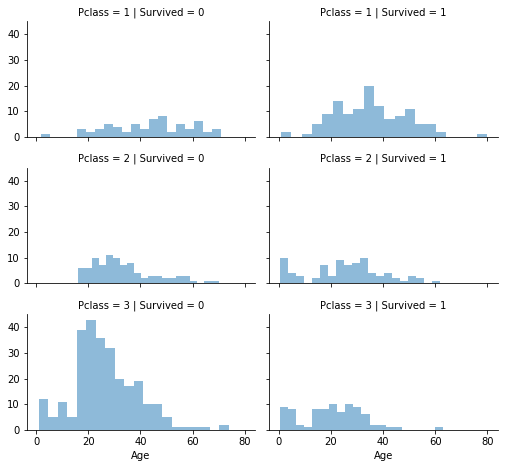

In [688]:
grid = sns.FacetGrid(dataset, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

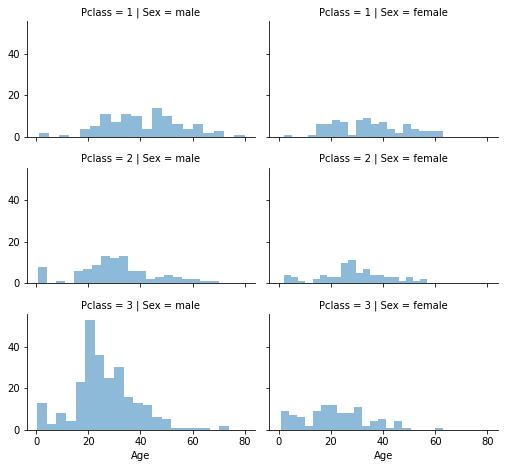

In [689]:
grid = sns.FacetGrid(dataset, col='Sex', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


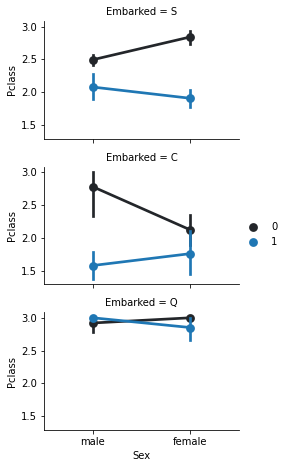

In [690]:
grid = sns.FacetGrid(dataset, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Sex', 'Pclass','Survived', alpha=.5)
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


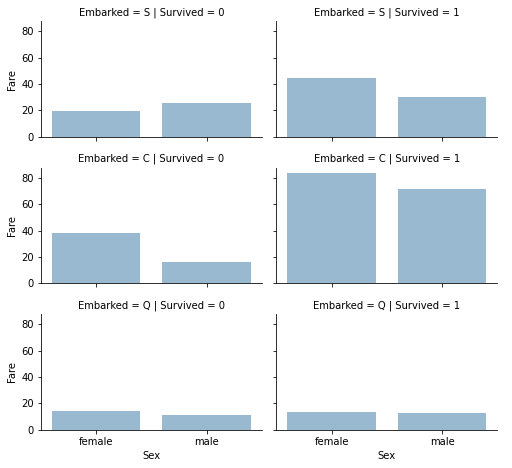

In [691]:
grid = sns.FacetGrid(dataset, col='Survived', row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5,ci=None)
grid.add_legend();

In [692]:
print(dataset.dtypes)#first 3 charcters of ticket shows the class of Ticket
dataset['Ticket_type'] = dataset['Ticket'].apply(lambda x: x[0:3])
dataset['Ticket_type'] = dataset['Ticket_type'].astype('category')
dataset['Ticket_type'] = dataset['Ticket_type'].cat.codes

testset['Ticket_type'] = testset['Ticket'].apply(lambda x: x[0:3])
testset['Ticket_type'] = testset['Ticket_type'].astype('category')
testset['Ticket_type'] = testset['Ticket_type'].cat.codes

#add indicator for cabin
# Feature that tells whether a passenger had a cabin on the Titanic
dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if pd.isna(x) else 1)
testset['Has_Cabin'] = testset["Cabin"].apply(lambda x: 0 if pd.isna(x) else 1)
dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
testset['Sex'] = testset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)


#Below may not be best method
dataset['Age'][np.isnan(dataset['Age'])] = dataset['Age'].mean()
dataset['Age'] = dataset['Age'].astype(int)
testset['Age'][np.isnan(testset['Age'])] = testset['Age'].mean()
testset['Age'] = testset['Age'].astype(int)

testset['Fare'][np.isnan(testset['Fare'])] = testset['Fare'].mean()

print(dataset.head())
print(testset.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   38      1      0   
2                             Heikkinen, Miss. Laina    0   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   35      1      0   
4                           Allen, Mr. William Henry    1   35      0      0   

            

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [693]:
print(len(pd.unique(dataset['Ticket'])))

681


681 out of 891 are unique tickets. Means 210 are associated with other passengers

In [694]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
dataset['IsAlone'] = 0
dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

testset['FamilySize'] = testset['SibSp'] + testset['Parch'] + 1
# Create new feature IsAlone from FamilySize
testset['IsAlone'] = 0
testset.loc[testset['FamilySize'] == 1, 'IsAlone'] = 1

In [695]:
dataset[["FamilySize","Survived"]].groupby(["FamilySize"], as_index = False).count().sort_values(by = "FamilySize",ascending = False).style.background_gradient("Greens")

,FamilySize,Survived
8,11,7
7,8,6
6,7,12
5,6,22
4,5,15
3,4,29
2,3,102
1,2,161
0,1,537


In [696]:
dataset[["IsAlone","Survived"]].groupby(["IsAlone"], as_index = False).count().sort_values(by = "IsAlone",ascending = False).style.background_gradient("Greens")

,IsAlone,Survived
1,1,537
0,0,354


In [697]:
#Name title also has importance
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        titleVal=title_search.group(1).replace('Dona', 'Rare').replace('Mlle', 'Miss').replace('Ms', 'Miss').replace('Mme', 'Mrs').replace('Lady', 'Rare').replace('Countess', 'Rare').replace('Capt', 'Rare').replace('Col', 'Rare').replace('Don', 'Rare').replace('Dr', 'Rare').replace('Major', 'Rare').replace('Rev', 'Rare').replace('Sir', 'Rare').replace('Jonkheer', 'Rare')
        return titleVal
    return ""
# Create a new feature Title, containing the titles of passenger names
dataset['Title'] = dataset['Name'].apply(get_title)
testset['Title'] = testset['Name'].apply(get_title)
#dataset.head()

In [698]:
print(pd.unique(dataset['Title']))
print(pd.unique(testset['Title']))

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [699]:
print(dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
dataset['Title'] = dataset['Title'].map( title_mapping ).astype(int)
testset['Title'] = testset['Title'].map( title_mapping).astype(int)

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [700]:
print(pd.unique(dataset['Embarked']))
print(pd.unique(testset['Embarked']))

['S' 'C' 'Q' nan]
['Q' 'S' 'C']


In [701]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')
testset['Embarked'] = testset["Embarked"].fillna('S')

embarked_mapping = {"Q": 1, "S": 2, "C": 3}
dataset['Embarked'] = dataset['Embarked'].map( embarked_mapping ).astype(int)
testset['Embarked'] = testset['Embarked'].map( embarked_mapping).astype(int)

In [702]:
dataset.drop(columns=["PassengerId","Cabin","Name","Ticket",'Parch', 'SibSp', 'FamilySize'],inplace=True)
testset.drop(columns=["PassengerId","Cabin","Name","Ticket",'Parch', 'SibSp', 'FamilySize'],inplace=True)

print(dataset.corr())
print(dataset.isnull().sum())
print(testset.isnull().sum())

             Survived    Pclass       Sex       Age      Fare  Embarked  \
Survived     1.000000 -0.338481 -0.543351 -0.067809  0.257307  0.125953   
Pclass      -0.338481  1.000000  0.131900 -0.335071 -0.549500 -0.305762   
Sex         -0.543351  0.131900  1.000000  0.082533 -0.182333 -0.022521   
Age         -0.067809 -0.335071  0.082533  1.000000  0.093856  0.034974   
Fare         0.257307 -0.549500 -0.182333  0.093856  1.000000  0.268865   
Embarked     0.125953 -0.305762 -0.022521  0.034974  0.268865  1.000000   
Ticket_type -0.168794  0.340741  0.059941 -0.085045 -0.030822 -0.028134   
Has_Cabin    0.316912 -0.725541 -0.140391  0.236172  0.482075  0.229371   
IsAlone     -0.203367  0.135207  0.303646  0.176639 -0.271832 -0.119710   
Title        0.407753 -0.173929 -0.502713 -0.095160  0.136310  0.037552   

             Ticket_type  Has_Cabin   IsAlone     Title  
Survived       -0.168794   0.316912 -0.203367  0.407753  
Pclass          0.340741  -0.725541  0.135207 -0.173929  


Means more females were survived

In [703]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Ticket_type,Has_Cabin,IsAlone,Title
0,0,3,1,22,7.2500,2,124,0,0,1
1,1,1,0,38,71.2833,3,137,1,0,3
2,1,3,0,26,7.9250,2,148,0,1,2
3,1,1,0,35,53.1000,2,3,1,0,3
4,0,3,1,35,8.0500,2,97,0,1,1


In [704]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0:1].values
X_test = testset.iloc[:, :].values

In [708]:
# Training the LogisticRegression model on the Training set
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X, y)
y_pred=regressor.predict(X_test)
regressor.score(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8047138047138047

In [706]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_param_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)
y_pred = rf_random.predict(X_test)
rf_random.score(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7179041359813823

In [713]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion="entropy",random_state=20)
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X_test)
decision_tree.score(X, y)

0.9921436588103255

DTC is overfitting

In [711]:
from sklearn.linear_model import SGDClassifier
reg = SGDClassifier()
reg.fit(X, y)
y_pred=reg.predict(X_test)
reg.score(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7182940516273849